In [27]:
#项目4-项目实施代码2

import pandas as pd
from sklearn import preprocessing

#导入数据，分别提取数据集的特征变量与标签
names=['label','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13']
dataset=pd.read_csv("wine-clean.data",names=names)
data=dataset.iloc[range(0,178),range(1,14)] #特征变量
target=dataset.iloc[range(0,178),range(0,1)].values.reshape(1,178)[0] #标签
#使用z-score方法进行数据标准化处理
cdata=preprocessing.StandardScaler().fit_transform(data)  #数据标准化处理
print(cdata)

[[ 1.51861254 -0.56906261  0.26105088 ...  0.39346131  1.83381234
   1.01300893]
 [ 0.24628963 -0.50234086 -0.90869274 ...  0.43875109  1.10735109
   0.96524152]
 [ 0.19687903  0.05049647  1.22911457 ...  0.34817153  0.7860317
   1.39514818]
 ...
 [ 0.33275817  1.88057869 -0.4246609  ... -1.64457872 -1.46320409
   0.28057537]
 [ 0.20923168  0.26972507  0.01903496 ... -1.59928894 -1.37938164
   0.29649784]
 [ 1.39508604  1.70900848  1.51146647 ... -1.55399916 -1.40732245
  -0.59516041]]


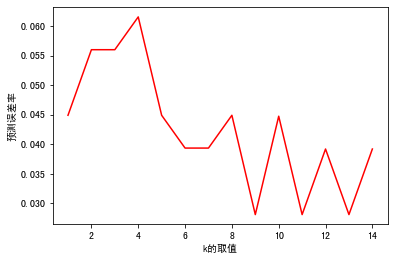

In [28]:
#寻求最合适的k值
#导入需要的库
from sklearn.neighbors import KNeighborsClassifier   #导入k近邻算法模块
from sklearn.model_selection import train_test_split #导入数据分割模块
from sklearn.model_selection import cross_val_score  #导入交叉验证模块
import matplotlib.pyplot as plt

#将特征变量与标签分别赋值给x和y，并将数据集拆分为训练集与测试集
x,y=cdata,target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) 
#k取不同值的情况下，模型的预测误差率计算
k_range=range(1,15)         #设置k值的取值范围
k_error=[]                  #保存预测误差率的数组
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,x,y,cv=5,scoring='accuracy')#5折交叉验证
    k_error.append(1-scores.mean())              

#画图，x轴表示k的取值，y轴表示预测误差率
plt.rcParams['font.sans-serif']='Simhei'
plt.plot(k_range,k_error,'r-')
plt.xlabel('k的取值')
plt.ylabel('预测误差率')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
#k=9时，训练模型
model=KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
#对模型进行评估
pred=model.predict(x_test)
ac=accuracy_score(y_test,pred)
print("模型预测准确率：",ac)
print("测试集的预测标签：",pred)
print("测试集的真实标签：",y_test)

模型预测准确率： 0.9555555555555556
测试集的预测标签： [1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 3 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]
测试集的真实标签： [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]
